# Prediciendo una cancion de Rock en español,  usando la herramienta de Tensorflow.

## Instalar matplotlib en Anaconda3

Se debe tener encuenta en que perfil se va a instalar esta libreria de anaconda 3. Se recomienda para este caso de Uso de Tensor Flow, primero instalar y activar el mismo para instalar el resto de librerias con las que se va a trabajar:

1. conda install -c conda-forge matplotlib
2. conda install matplotlib
3. conda install matplotlib.pyplot
4. pip install matplotlib

## Importar Librerias

In [1]:
# manipulacion de archivos y carpetas
import io
import os
import requests # libreria que nos permite conectarnos a una direccion online o una URL

In [2]:
import matplotlib.pyplot as plt # Para trabajar los asuntos de generacion de graficos (una de varias librerias que hay)
plt.rcParams['figure.figsize'] = (16,9) #tamaño de la figura (ancho,alto)
plt.style.use('ggplot') # estilo grafico de las imagenes generadas
# guardar las imagenes y tablas en el notebook
%matplotlib inline 

In [3]:
import numpy as np
import time #Para uso del tiempo
import sys

### Instalacion de Tensor en Anaconda3

https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/

1. Download and install Anaconda or the smaller Miniconda.

2. On Windows open the Start menu and open an Anaconda Command Prompt. On macOS or Linux open a terminal window. Use the default bash shell on macOS or Linux.

3. Choose a name for your TensorFlow environment, such as “tf”.

4. To install the current release of CPU-only TensorFlow, recommended for beginners:

In [4]:
# conda create -n tf tensorflow
# conda activate tf

Or, to install the current release of GPU TensorFlow on Linux or Windows:

In [5]:
#conda create -n tf-gpu tensorflow-gpu
#conda activate tf-gpu

### Libreria Tensor Flow

In [6]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      0.13.0
aiohttp                      3.8.1
aiosignal                    1.2.0
anyio                        2.2.0
argon2-cffi                  20.1.0
astor                        0.8.1
astunparse                   1.6.3
async-generator              1.10
async-timeout                4.0.1
attrs                        21.2.0
Babel                        2.9.1
backcall                     0.2.0
bleach                       4.0.0
blinker                      1.4
brotlipy                     0.7.0
cachetools                   4.2.2
certifi                      2021.10.8
cffi                         1.15.0
charset-normalizer           2.0.4
click                        8.0.3
colorama                     0.4.4
cryptography                 3.4.8
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.0
defusedxml                   0.7.1
entrypoi

In [7]:
!pip install tensorflow-gpu

In [8]:
#Librerias enfocadas al Deep Learning
import tensorflow as tf

In [9]:
print("Version: ", tf.__version__)
print("GPU esta", "disponible" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")
print("Dispositivos disponibles: ", tf.config.list_physical_devices())

Version:  2.7.0
GPU esta disponible
Dispositivos disponibles:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

### Activacion de la GPU

Uso de GPU para entrenar en tensorflow

https://medium.com/analytics-vidhya/solution-to-tensorflow-2-not-using-gpu-119fb3e04daa

Elejir una de las siguientes dos:

In [11]:
#tf.device('/CPU:0') #activando la CPU

In [11]:
tf.device('/GPU:0') #activando la GPU

### Directorio en PC

In [203]:
# directorio donde guardar los checkpoints en pc
root = 'C:/Users/derma/Documents/Checkpoints Deep/'

### Descargar y preprocesar los datos

In [204]:
fileDL= tf.keras.utils.get_file('100CancionesParaEntrenar100-100.txt','https://raw.githubusercontent.com/DerUwU/Deep-Learning/main/Proyecto%20Final/Dataset/100CancionesParaEntrenar100-100.txt')
texto = open(fileDL, 'rb').read().decode(encoding='utf-8')

In [205]:
# Si se quiere mostrar el texto que ha sido cargado
print(texto)

Flaca
No me claves tus puñales por la espalda
Tan profundo
No me duelen, no me hacen mal

Lejos
En el centro de la tierra
Las raíces del amor
Donde estaban, quedarán

Entre el no me olvides
Me dejé nuestros abriles olvidados
En el fondo del placard
Del cuarto de invitados
Eran tiempos dorados
Un pasado mejor

Aunque casi me equivoco y te digo poco a poco:
No me mientas, no me digas la verdad,
No te quedes callada, no levantes la voz,
Ni me pidas perdón

Aunque casi te confieso
Que también he sido un perro compañero
Un perro ideal que aprendió a ladrar
Y a volver al hogar, para poder comer

Flaca
No me claves, tus puñales, por la espalda
Tan profundo
No me duelen, no me hacen mal

Lejos
En el centro de la tierra
Las raíces del amor
Donde estaban, quedaran
Ay
Ven y dime todas esas cosas
Invítame a sentarme junto a ti
Escucharé todos tus sueños
En mi oído

Y déjame estrechar tus manos
Y regalarte unas pocas de ilusiones
Ay, ven y cuéntame una historia
Que me haga sentir bien

Yo te escuch

### Limpiar el texto

In [206]:
vocab = sorted(set(texto))
print('el texto esta compuesto de estos :{} caracteres'. format(len(vocab)))
print(vocab)

el texto esta compuesto de estos :83 caracteres
['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¡', '¿', 'É', 'Ó', 'à', 'á', 'è', 'é', 'í', 'ñ', 'ó', 'ú', 'ü']


### Pasar texto a Minisculas

In [207]:
texto = texto.lower()

#### Reemplazar caracteres por espacios

In [208]:
texto = texto.replace('á','a')
texto = texto.replace('é','e')
texto = texto.replace('í','i')
texto = texto.replace('ó','o')
texto = texto.replace('ú','u')

In [209]:
texto = texto.replace('(','')
texto = texto.replace(')','')
texto = texto.replace('*','')
texto = texto.replace('!','')
texto = texto.replace('¡','')
texto = texto.replace('"','')
texto = texto.replace('&','')
texto = texto.replace("'","")
texto = texto.replace(',','')
texto = texto.replace('.','')
texto = texto.replace('-','')
texto = texto.replace('_','')
texto = texto.replace(':','')
texto = texto.replace('/','')
texto = texto.replace('$','')
texto = texto.replace('%','')
texto = texto.replace('=','')
texto = texto.replace(';','')
texto = texto.replace('?','')
texto = texto.replace('¿','')
texto = texto.replace('[','')
texto = texto.replace(']','')
texto = texto.replace('«','')
texto = texto.replace('º','')
texto = texto.replace('»','')
texto = texto.replace('“','')
texto = texto.replace('”','')
texto = texto.replace('…','')

In [210]:
texto = texto.replace('—','')
texto = texto.replace('ü','u')
texto = texto.replace('ä','a')
texto = texto.replace('\n',' ')
texto = texto.replace('à','a')
texto = texto.replace('è','e')

In [211]:
texto = texto.replace('0','')
texto = texto.replace('1','')
texto = texto.replace('2','')
texto = texto.replace('3','')
texto = texto.replace('4','')
texto = texto.replace('5','')
texto = texto.replace('6','')
texto = texto.replace('7','')
texto = texto.replace('8','')
texto = texto.replace('9','')

In [212]:
vocab = sorted(set(texto))
print('el texto esta compuesto de estos :{} caracteres'. format(len(vocab)))
print(vocab)

el texto esta compuesto de estos :28 caracteres
[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ñ']


## Entendiendo El Texto

In [213]:
print('el texto tiene longitud de:{} caracteres'. format(len(texto)))
vocab = sorted(set(texto))
print('el texto esta compuesto de estos :{} caracteres'. format(len(vocab)))
print(vocab)

el texto tiene longitud de:117027 caracteres
el texto esta compuesto de estos :28 caracteres
[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ñ']


In [214]:
print(texto)

flaca no me claves tus puñales por la espalda tan profundo no me duelen no me hacen mal  lejos en el centro de la tierra las raices del amor donde estaban quedaran  entre el no me olvides me deje nuestros abriles olvidados en el fondo del placard del cuarto de invitados eran tiempos dorados un pasado mejor  aunque casi me equivoco y te digo poco a poco no me mientas no me digas la verdad no te quedes callada no levantes la voz ni me pidas perdon  aunque casi te confieso que tambien he sido un perro compañero un perro ideal que aprendio a ladrar y a volver al hogar para poder comer  flaca no me claves tus puñales por la espalda tan profundo no me duelen no me hacen mal  lejos en el centro de la tierra las raices del amor donde estaban quedaran ay ven y dime todas esas cosas invitame a sentarme junto a ti escuchare todos tus sueños en mi oido  y dejame estrechar tus manos y regalarte unas pocas de ilusiones ay ven y cuentame una historia que me haga sentir bien  yo te escuchare con todo 

## Pasar el texto a numeros

Las redes neuronales solo procesan valores numéricos, no letras, por tanto tenemos que traducir los caracteres a representación numérica. Para ello crearemos dos “tablas de traducción”: una de caracteres a números y otra de números a caracteres

In [215]:
# ordena los caracteres presentes en el texto de forma alfabetica como en una lista
# a cada uno de los caracteres listados asigname un numero ordenado

In [216]:
char2idx = {u:i for i, u in enumerate(vocab)} # asignamos un número a cada vocablo
idx2char = np.array(vocab)

#pasamos todo el texto a números
texto_como_entero= np.array([char2idx[c] for c in texto])
print('texto: {}'.format(repr(texto[:100])))
print('{}'.format(repr(texto_como_entero[:100])))

texto: 'flaca no me claves tus puñales por la espalda tan profundo no me duelen no me hacen mal  lejos en el'
array([ 6, 12,  1,  3,  1,  0, 14, 15,  0, 13,  5,  0,  3, 12,  1, 22,  5,
       19,  0, 20, 21, 19,  0, 16, 21, 27,  1, 12,  5, 19,  0, 16, 15, 18,
        0, 12,  1,  0,  5, 19, 16,  1, 12,  4,  1,  0, 20,  1, 14,  0, 16,
       18, 15,  6, 21, 14,  4, 15,  0, 14, 15,  0, 13,  5,  0,  4, 21,  5,
       12,  5, 14,  0, 14, 15,  0, 13,  5,  0,  8,  1,  3,  5, 14,  0, 13,
        1, 12,  0,  0, 12,  5, 10, 15, 19,  0,  5, 14,  0,  5, 12])


In [217]:
#-----------revisando las conversiones
#for char,_ in zip(char2idx, range(len(vocab))):
#    print(' {:4s}: {:3d},'.format(repr(char),char2idx[char]))

## Preparar los datos para ser usados en la RNN

In [218]:
char_dataset= tf.data.Dataset.from_tensor_slices(texto_como_entero)
#cantidad de secuencia de caracteres
secu_length=350
#creamos secuencias de maximo 100 caractereres
secuencias= char_dataset.batch(secu_length+1, drop_remainder=True)
for item in secuencias.take(10):
  print(repr(''.join(idx2char[item.numpy()])))

'flaca no me claves tus puñales por la espalda tan profundo no me duelen no me hacen mal  lejos en el centro de la tierra las raices del amor donde estaban quedaran  entre el no me olvides me deje nuestros abriles olvidados en el fondo del placard del cuarto de invitados eran tiempos dorados un pasado mejor  aunque casi me equivoco y te digo poco a p'
'oco no me mientas no me digas la verdad no te quedes callada no levantes la voz ni me pidas perdon  aunque casi te confieso que tambien he sido un perro compañero un perro ideal que aprendio a ladrar y a volver al hogar para poder comer  flaca no me claves tus puñales por la espalda tan profundo no me duelen no me hacen mal  lejos en el centro de la'
' tierra las raices del amor donde estaban quedaran ay ven y dime todas esas cosas invitame a sentarme junto a ti escuchare todos tus sueños en mi oido  y dejame estrechar tus manos y regalarte unas pocas de ilusiones ay ven y cuentame una historia que me haga sentir bien  yo te escuchare co

### Separar los datos en agrupamientos (batches)

In [219]:
#funcion para obtener el conjunto de datos de trainning
def split_input_target(chunk):
  input_text = chunk[:-1]
  target_text= chunk[1:]
  return input_text, target_text

dataset  = secuencias.map(split_input_target)

for input_example, target_example in dataset.take(1):
  print('input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print('Target data: ', repr(''.join(idx2char[target_example.numpy()])))

input data:  'flaca no me claves tus puñales por la espalda tan profundo no me duelen no me hacen mal  lejos en el centro de la tierra las raices del amor donde estaban quedaran  entre el no me olvides me deje nuestros abriles olvidados en el fondo del placard del cuarto de invitados eran tiempos dorados un pasado mejor  aunque casi me equivoco y te digo poco a '
Target data:  'laca no me claves tus puñales por la espalda tan profundo no me duelen no me hacen mal  lejos en el centro de la tierra las raices del amor donde estaban quedaran  entre el no me olvides me deje nuestros abriles olvidados en el fondo del placard del cuarto de invitados eran tiempos dorados un pasado mejor  aunque casi me equivoco y te digo poco a p'


In [220]:
#el dataset contiene un conjunto de parejas de secuencia de texto
#(con la representación numérica de los caracteres), donde el 
#primer componente de la pareja contiene un paquete con una secuencia 
#de 100 caracteres del texto original y la segunda su correspondiente salida, 
#también de 100 caracteres. )

In [221]:
#imprimimos el tensor del dataset
print(dataset)

<MapDataset shapes: ((350,), (350,)), types: (tf.int32, tf.int32)>


In [222]:
#Hyper-Parametros para entrenamiento  de una rede neuronal 
#   -los datos se agrupan en batch
BATCH_SIZE= 128
#    -Tamaño de memoria disponible 
BUFFER_SIZE=100000

In [223]:
dataset= dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
print (dataset)

<BatchDataset shapes: ((128, 350), (128, 350)), types: (tf.int32, tf.int32)>


In [224]:
#En el tensor dataset disponemos los datos de entrenamiento
#con agrupamienttos (batches) compuestos de 64 parejas de secuencias 
#de 100 integers de 64 bits que representan el carácter correspondiente 
#en el vocabulario.

## Construcción del modelo RNN

Para construir el modelo usaremos tf.keras.Sequential. Usaremos una versión mínima de RNN, que contenga solo una capa LSTM y 3 capas.

In [225]:
#como es un problema de clasificación estándar 
#para el que debemos definir la función de Lossy el optimizador.
def lossy(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

def create_model(vocab_size, embedding_dim, rnn_units, batch_size):
  #creando el modelo
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                         return_sequences=True,
                         stateful=True,
                         recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)                               
  ])
  #En cuanto al optimizador usaremos tf.keras.optimizers.Adam 
  #con los argumentos por defecto del optimizador Adam. 
  model.compile(optimizer='adam',
              loss=lossy,
              metrics=['accuracy'])
  return model
vocab_size= len(vocab)
#dimensiones de los vectores que tendrá la capa.
embedding_dim= 1024
#cantidad de neuronas
rnn_units=1024
#creamos nuestra red neuronal RNN
model=create_model(vocab_size   =vocab_size,
                  embedding_dim =embedding_dim,
                  rnn_units     =rnn_units,
                  batch_size    =BATCH_SIZE)
#summary()para visualizar la estructura del modelo
model.summary()
#resultados=  -La capa LSTM consta más de 5 millones de parametros)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (128, None, 1024)         28672     
                                                                 
 lstm_14 (LSTM)              (128, None, 1024)         8392704   
                                                                 
 dense_14 (Dense)            (128, None, 28)           28700     
                                                                 
Total params: 8,450,076
Trainable params: 8,450,076
Non-trainable params: 0
_________________________________________________________________


## Creando chekpoints

Una técnica de tolerancia de fallos para procesos cuyo tiempo de ejecución es muy largo. La idea es guardar una instantánea del estado del sistema periódicamente para recuperar desde ese punto la ejecución en caso de fallo del sistema.

In [226]:
print(root)

C:/Users/derma/Documents/Checkpoints Deep/


In [227]:
checkpoint_dir=root

Se utiliza un checkpoint_dir en un espacio en DRIVE para mejorar la situacion del entranimiento. Google Colab ofrece un espacio en disco limitado para guardar variables, cada checkpoint en este proceso en concreto puede llegar a pesar 60 a 70MB, con un entrenamiento relativamente basico de 1000 Epochs, tendriamos un espacio de 70000MB o 70Gb en disco de los cuales requerir.

In [228]:
checkpoint_prefix= os.path.join(checkpoint_dir,"cp_{epoch:04d}.ckpt")


cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,
                                               monitor='loss',
                                               verbose=1,
                                               save_weights_only=True,
                                               save_best_only=True,
                                               mode='auto')

## Entrenando la RNN

### Entrenamiento desde Checkpoint 0

Se recomienda investigar los siguientes enlaces de informacion:

1. https://keras.io/api/callbacks/model_checkpoint/
2. https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6

In [229]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Thu_Nov_18_09:52:33_Pacific_Standard_Time_2021
Cuda compilation tools, release 11.5, V11.5.119
Build cuda_11.5.r11.5/compiler.30672275_0


In [230]:
# ciclos de entrenamiento = 500
# verbose 0 = no quiero ver por terminal la descripcion de cada ciclo de entrenamiento
# vervose 0 = menor requerimiento de recursos en el entrenamiento, se utiliza netamiente la GPU para entrenar

EPOCHS=2500
history=model.fit(dataset, 
                  epochs=EPOCHS, 
                  verbose=1,
                  callbacks=[cp_callback]) #6000 + 6000 + 1000 + 2500

Epoch 1/2500
2/2 [==============================] - ETA: 0s - loss: 3.2739 - accuracy: 0.1147
Epoch 00001: loss improved from inf to 3.27394, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0001.ckpt
2/2 [==============================] - 4s 1s/step - loss: 3.2739 - accuracy: 0.1147
Epoch 2/2500
2/2 [==============================] - ETA: 0s - loss: 3.4086 - accuracy: 0.1568
Epoch 00002: loss did not improve from 3.27394
2/2 [==============================] - 2s 929ms/step - loss: 3.4086 - accuracy: 0.1568
Epoch 3/2500
2/2 [==============================] - ETA: 0s - loss: 3.0767 - accuracy: 0.1156
Epoch 00003: loss improved from 3.27394 to 3.07674, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0003.ckpt
2/2 [==============================] - 2s 1s/step - loss: 3.0767 - accuracy: 0.1156
Epoch 4/2500
2/2 [==============================] - ETA: 0s - loss: 2.8551 - accuracy: 0.1406
Epoch 00004: loss improved from 3.07674 to 2.85508, saving model to C:/Users/der

2/2 [==============================] - 2s 1s/step - loss: 2.0988 - accuracy: 0.3385
Epoch 29/2500
2/2 [==============================] - ETA: 0s - loss: 2.0951 - accuracy: 0.3479
Epoch 00029: loss improved from 2.09883 to 2.09512, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0029.ckpt
2/2 [==============================] - 2s 1s/step - loss: 2.0951 - accuracy: 0.3479
Epoch 30/2500
2/2 [==============================] - ETA: 0s - loss: 2.0865 - accuracy: 0.3440
Epoch 00030: loss improved from 2.09512 to 2.08653, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0030.ckpt
2/2 [==============================] - 2s 1s/step - loss: 2.0865 - accuracy: 0.3440
Epoch 31/2500
2/2 [==============================] - ETA: 0s - loss: 2.0771 - accuracy: 0.3499
Epoch 00031: loss improved from 2.08653 to 2.07712, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0031.ckpt
2/2 [==============================] - 2s 1s/step - loss: 2.0771 - accuracy: 0.3499
Epoch 32/2

2/2 [==============================] - ETA: 0s - loss: 1.8852 - accuracy: 0.4021
Epoch 00057: loss improved from 1.88914 to 1.88520, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0057.ckpt
2/2 [==============================] - 2s 1s/step - loss: 1.8852 - accuracy: 0.4021
Epoch 58/2500
2/2 [==============================] - ETA: 0s - loss: 1.8610 - accuracy: 0.4090
Epoch 00058: loss improved from 1.88520 to 1.86102, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0058.ckpt
2/2 [==============================] - 2s 1s/step - loss: 1.8610 - accuracy: 0.4090
Epoch 59/2500
2/2 [==============================] - ETA: 0s - loss: 1.8549 - accuracy: 0.4125
Epoch 00059: loss improved from 1.86102 to 1.85492, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0059.ckpt
2/2 [==============================] - 2s 1s/step - loss: 1.8549 - accuracy: 0.4125
Epoch 60/2500
2/2 [==============================] - ETA: 0s - loss: 1.8561 - accuracy: 0.4144
Epoch 00060: 

2/2 [==============================] - ETA: 0s - loss: 1.6254 - accuracy: 0.4951
Epoch 00085: loss improved from 1.63180 to 1.62539, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0085.ckpt
2/2 [==============================] - 3s 2s/step - loss: 1.6254 - accuracy: 0.4951
Epoch 86/2500
2/2 [==============================] - ETA: 0s - loss: 1.6138 - accuracy: 0.5013
Epoch 00086: loss improved from 1.62539 to 1.61384, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0086.ckpt
2/2 [==============================] - 3s 2s/step - loss: 1.6138 - accuracy: 0.5013
Epoch 87/2500
2/2 [==============================] - ETA: 0s - loss: 1.6103 - accuracy: 0.5016
Epoch 00087: loss improved from 1.61384 to 1.61034, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0087.ckpt
2/2 [==============================] - 3s 1s/step - loss: 1.6103 - accuracy: 0.5016
Epoch 88/2500
2/2 [==============================] - ETA: 0s - loss: 1.6001 - accuracy: 0.5045
Epoch 00088: 

Epoch 113/2500
2/2 [==============================] - ETA: 0s - loss: 1.3339 - accuracy: 0.6010
Epoch 00113: loss improved from 1.35469 to 1.33394, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0113.ckpt
2/2 [==============================] - 3s 2s/step - loss: 1.3339 - accuracy: 0.6010
Epoch 114/2500
2/2 [==============================] - ETA: 0s - loss: 1.3339 - accuracy: 0.5974
Epoch 00114: loss improved from 1.33394 to 1.33390, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0114.ckpt
2/2 [==============================] - 3s 2s/step - loss: 1.3339 - accuracy: 0.5974
Epoch 115/2500
2/2 [==============================] - ETA: 0s - loss: 1.3204 - accuracy: 0.6032
Epoch 00115: loss improved from 1.33390 to 1.32042, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0115.ckpt
2/2 [==============================] - 6s 5s/step - loss: 1.3204 - accuracy: 0.6032
Epoch 116/2500
2/2 [==============================] - ETA: 0s - loss: 1.3134 - accuracy: 0.

2/2 [==============================] - ETA: 0s - loss: 0.9952 - accuracy: 0.7171
Epoch 00141: loss improved from 1.01431 to 0.99523, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0141.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.9952 - accuracy: 0.7171
Epoch 142/2500
2/2 [==============================] - ETA: 0s - loss: 0.9888 - accuracy: 0.7214
Epoch 00142: loss improved from 0.99523 to 0.98880, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0142.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.9888 - accuracy: 0.7214
Epoch 143/2500
2/2 [==============================] - ETA: 0s - loss: 0.9595 - accuracy: 0.7302
Epoch 00143: loss improved from 0.98880 to 0.95946, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0143.ckpt
2/2 [==============================] - 4s 3s/step - loss: 0.9595 - accuracy: 0.7302
Epoch 144/2500
2/2 [==============================] - ETA: 0s - loss: 0.9514 - accuracy: 0.7344
Epoch 0014

Epoch 171/2500
2/2 [==============================] - ETA: 0s - loss: 0.5947 - accuracy: 0.8521
Epoch 00171: loss improved from 0.61265 to 0.59468, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0171.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.5947 - accuracy: 0.8521
Epoch 172/2500
2/2 [==============================] - ETA: 0s - loss: 0.5796 - accuracy: 0.8593
Epoch 00172: loss improved from 0.59468 to 0.57959, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0172.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.5796 - accuracy: 0.8593
Epoch 173/2500
2/2 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.8629
Epoch 00173: loss improved from 0.57959 to 0.56795, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0173.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.5680 - accuracy: 0.8629
Epoch 174/2500
2/2 [==============================] - ETA: 0s - loss: 0.5531 - accuracy: 0.

2/2 [==============================] - ETA: 0s - loss: 0.3066 - accuracy: 0.9482
Epoch 00199: loss improved from 0.31717 to 0.30664, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0199.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.3066 - accuracy: 0.9482
Epoch 200/2500
2/2 [==============================] - ETA: 0s - loss: 0.2998 - accuracy: 0.9488
Epoch 00200: loss improved from 0.30664 to 0.29975, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0200.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.2998 - accuracy: 0.9488
Epoch 201/2500
2/2 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.9519
Epoch 00201: loss improved from 0.29975 to 0.29326, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0201.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.2933 - accuracy: 0.9519
Epoch 202/2500
2/2 [==============================] - ETA: 0s - loss: 0.2824 - accuracy: 0.9548
Epoch 0020

2/2 [==============================] - 3s 2s/step - loss: 0.1800 - accuracy: 0.9735
Epoch 227/2500
2/2 [==============================] - ETA: 0s - loss: 0.1746 - accuracy: 0.9742
Epoch 00227: loss improved from 0.17997 to 0.17459, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0227.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.1746 - accuracy: 0.9742
Epoch 228/2500
2/2 [==============================] - ETA: 0s - loss: 0.1713 - accuracy: 0.9746
Epoch 00228: loss improved from 0.17459 to 0.17125, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0228.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.1713 - accuracy: 0.9746
Epoch 229/2500
2/2 [==============================] - ETA: 0s - loss: 0.1713 - accuracy: 0.9748
Epoch 00229: loss did not improve from 0.17125
2/2 [==============================] - 3s 1s/step - loss: 0.1713 - accuracy: 0.9748
Epoch 230/2500
2/2 [==============================] - ETA: 0s - loss: 0.1702 - accu

2/2 [==============================] - ETA: 0s - loss: 0.1281 - accuracy: 0.9800
Epoch 00256: loss improved from 0.12886 to 0.12812, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0256.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.1281 - accuracy: 0.9800
Epoch 257/2500
2/2 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9803
Epoch 00257: loss improved from 0.12812 to 0.12662, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0257.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.1266 - accuracy: 0.9803
Epoch 258/2500
2/2 [==============================] - ETA: 0s - loss: 0.1271 - accuracy: 0.9796
Epoch 00258: loss did not improve from 0.12662
2/2 [==============================] - 3s 1s/step - loss: 0.1271 - accuracy: 0.9796
Epoch 259/2500
2/2 [==============================] - ETA: 0s - loss: 0.1269 - accuracy: 0.9798
Epoch 00259: loss did not improve from 0.12662
2/2 [==============================] - 

2/2 [==============================] - 4s 2s/step - loss: 0.1059 - accuracy: 0.9822
Epoch 287/2500
2/2 [==============================] - ETA: 0s - loss: 0.1081 - accuracy: 0.9822
Epoch 00287: loss did not improve from 0.10592
2/2 [==============================] - 3s 1s/step - loss: 0.1081 - accuracy: 0.9822
Epoch 288/2500
2/2 [==============================] - ETA: 0s - loss: 0.1057 - accuracy: 0.9821
Epoch 00288: loss improved from 0.10592 to 0.10569, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0288.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.1057 - accuracy: 0.9821
Epoch 289/2500
2/2 [==============================] - ETA: 0s - loss: 0.1057 - accuracy: 0.9821
Epoch 00289: loss improved from 0.10569 to 0.10566, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0289.ckpt
2/2 [==============================] - 4s 2s/step - loss: 0.1057 - accuracy: 0.9821
Epoch 290/2500
2/2 [==============================] - ETA: 0s - loss: 0.1065 - accu

2/2 [==============================] - ETA: 0s - loss: 0.0920 - accuracy: 0.9842
Epoch 00319: loss did not improve from 0.09060
2/2 [==============================] - 3s 1s/step - loss: 0.0920 - accuracy: 0.9842
Epoch 320/2500
2/2 [==============================] - ETA: 0s - loss: 0.0919 - accuracy: 0.9844
Epoch 00320: loss did not improve from 0.09060
2/2 [==============================] - 3s 1s/step - loss: 0.0919 - accuracy: 0.9844
Epoch 321/2500
2/2 [==============================] - ETA: 0s - loss: 0.0905 - accuracy: 0.9846
Epoch 00321: loss improved from 0.09060 to 0.09048, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0321.ckpt
2/2 [==============================] - 4s 2s/step - loss: 0.0905 - accuracy: 0.9846
Epoch 322/2500
2/2 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9845
Epoch 00322: loss improved from 0.09048 to 0.09035, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0322.ckpt
2/2 [==============================] - 

Epoch 351/2500
2/2 [==============================] - ETA: 0s - loss: 0.0815 - accuracy: 0.9857
Epoch 00351: loss did not improve from 0.08132
2/2 [==============================] - 3s 1s/step - loss: 0.0815 - accuracy: 0.9857
Epoch 352/2500
2/2 [==============================] - ETA: 0s - loss: 0.0825 - accuracy: 0.9857
Epoch 00352: loss did not improve from 0.08132
2/2 [==============================] - 3s 1s/step - loss: 0.0825 - accuracy: 0.9857
Epoch 353/2500
2/2 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.9859
Epoch 00353: loss improved from 0.08132 to 0.08037, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0353.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.0804 - accuracy: 0.9859
Epoch 354/2500
2/2 [==============================] - ETA: 0s - loss: 0.0796 - accuracy: 0.9860
Epoch 00354: loss improved from 0.08037 to 0.07964, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0354.ckpt
2/2 [===================

Epoch 384/2500
2/2 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9867
Epoch 00384: loss did not improve from 0.07198
2/2 [==============================] - 3s 1s/step - loss: 0.0750 - accuracy: 0.9867
Epoch 385/2500
2/2 [==============================] - ETA: 0s - loss: 0.0721 - accuracy: 0.9870
Epoch 00385: loss did not improve from 0.07198
2/2 [==============================] - 3s 2s/step - loss: 0.0721 - accuracy: 0.9870
Epoch 386/2500
2/2 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 0.9873
Epoch 00386: loss improved from 0.07198 to 0.07081, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_0386.ckpt
2/2 [==============================] - 4s 2s/step - loss: 0.0708 - accuracy: 0.9873
Epoch 387/2500
2/2 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.9872
Epoch 00387: loss did not improve from 0.07081
2/2 [==============================] - 3s 1s/step - loss: 0.0722 - accuracy: 0.9872
Epoch 388/2500
2

2/2 [==============================] - ETA: 0s - loss: 0.0660 - accuracy: 0.9881
Epoch 00418: loss did not improve from 0.06495
2/2 [==============================] - 3s 1s/step - loss: 0.0660 - accuracy: 0.9881
Epoch 419/2500
2/2 [==============================] - ETA: 0s - loss: 0.0673 - accuracy: 0.9877
Epoch 00419: loss did not improve from 0.06495
2/2 [==============================] - 3s 1s/step - loss: 0.0673 - accuracy: 0.9877
Epoch 420/2500
2/2 [==============================] - ETA: 0s - loss: 0.0664 - accuracy: 0.9878
Epoch 00420: loss did not improve from 0.06495
2/2 [==============================] - 3s 1s/step - loss: 0.0664 - accuracy: 0.9878
Epoch 421/2500
2/2 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9880
Epoch 00421: loss did not improve from 0.06495
2/2 [==============================] - 3s 1s/step - loss: 0.0663 - accuracy: 0.9880
Epoch 422/2500
2/2 [==============================] - ETA: 0s - loss: 0.0660 - accuracy: 0.9881
Epoch 00422

Epoch 451/2500
2/2 [==============================] - ETA: 0s - loss: 0.0608 - accuracy: 0.9888
Epoch 00451: loss did not improve from 0.06078
2/2 [==============================] - 3s 1s/step - loss: 0.0608 - accuracy: 0.9888
Epoch 452/2500
2/2 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9886
Epoch 00452: loss did not improve from 0.06078
2/2 [==============================] - 3s 1s/step - loss: 0.0619 - accuracy: 0.9886
Epoch 453/2500
2/2 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9883
Epoch 00453: loss did not improve from 0.06078
2/2 [==============================] - 3s 1s/step - loss: 0.0625 - accuracy: 0.9883
Epoch 454/2500
2/2 [==============================] - ETA: 0s - loss: 0.0613 - accuracy: 0.9888
Epoch 00454: loss did not improve from 0.06078
2/2 [==============================] - 3s 1s/step - loss: 0.0613 - accuracy: 0.9888
Epoch 455/2500
2/2 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9

Epoch 486/2500
2/2 [==============================] - ETA: 0s - loss: 1.6476 - accuracy: 0.4843
Epoch 00486: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.6476 - accuracy: 0.4843
Epoch 487/2500
2/2 [==============================] - ETA: 0s - loss: 1.6452 - accuracy: 0.4871
Epoch 00487: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.6452 - accuracy: 0.4871
Epoch 488/2500
2/2 [==============================] - ETA: 0s - loss: 1.6171 - accuracy: 0.4967
Epoch 00488: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.6171 - accuracy: 0.4967
Epoch 489/2500
2/2 [==============================] - ETA: 0s - loss: 1.6233 - accuracy: 0.4930
Epoch 00489: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.6233 - accuracy: 0.4930
Epoch 490/2500
2/2 [==============================] - ETA: 0s - loss: 1.6040 - accuracy: 0.4

2/2 [==============================] - ETA: 0s - loss: 1.3722 - accuracy: 0.5755
Epoch 00522: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.3722 - accuracy: 0.5755
Epoch 523/2500
2/2 [==============================] - ETA: 0s - loss: 1.3523 - accuracy: 0.5824
Epoch 00523: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.3523 - accuracy: 0.5824
Epoch 524/2500
2/2 [==============================] - ETA: 0s - loss: 1.3505 - accuracy: 0.5829
Epoch 00524: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.3505 - accuracy: 0.5829
Epoch 525/2500
2/2 [==============================] - ETA: 0s - loss: 1.3504 - accuracy: 0.5836
Epoch 00525: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.3504 - accuracy: 0.5836
Epoch 526/2500
2/2 [==============================] - ETA: 0s - loss: 1.3476 - accuracy: 0.5832
Epoch 00526

2/2 [==============================] - ETA: 0s - loss: 1.1779 - accuracy: 0.6414
Epoch 00558: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.1779 - accuracy: 0.6414
Epoch 559/2500
2/2 [==============================] - ETA: 0s - loss: 1.1696 - accuracy: 0.6470
Epoch 00559: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.1696 - accuracy: 0.6470
Epoch 560/2500
2/2 [==============================] - ETA: 0s - loss: 1.1680 - accuracy: 0.6470
Epoch 00560: loss did not improve from 0.05852
2/2 [==============================] - 3s 2s/step - loss: 1.1680 - accuracy: 0.6470
Epoch 561/2500
2/2 [==============================] - ETA: 0s - loss: 1.1693 - accuracy: 0.6467
Epoch 00561: loss did not improve from 0.05852
2/2 [==============================] - 3s 2s/step - loss: 1.1693 - accuracy: 0.6467
Epoch 562/2500
2/2 [==============================] - ETA: 0s - loss: 1.1689 - accuracy: 0.6466
Epoch 00562

2/2 [==============================] - ETA: 0s - loss: 1.0060 - accuracy: 0.7008
Epoch 00594: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.0060 - accuracy: 0.7008
Epoch 595/2500
2/2 [==============================] - ETA: 0s - loss: 0.9952 - accuracy: 0.7051
Epoch 00595: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.9952 - accuracy: 0.7051
Epoch 596/2500
2/2 [==============================] - ETA: 0s - loss: 0.9934 - accuracy: 0.7059
Epoch 00596: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.9934 - accuracy: 0.7059
Epoch 597/2500
2/2 [==============================] - ETA: 0s - loss: 1.0079 - accuracy: 0.7010
Epoch 00597: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 1.0079 - accuracy: 0.7010
Epoch 598/2500
2/2 [==============================] - ETA: 0s - loss: 0.9880 - accuracy: 0.7079
Epoch 00598

2/2 [==============================] - ETA: 0s - loss: 0.8209 - accuracy: 0.7666
Epoch 00630: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.8209 - accuracy: 0.7666
Epoch 631/2500
2/2 [==============================] - ETA: 0s - loss: 0.8294 - accuracy: 0.7632
Epoch 00631: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.8294 - accuracy: 0.7632
Epoch 632/2500
2/2 [==============================] - ETA: 0s - loss: 0.8195 - accuracy: 0.7667
Epoch 00632: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.8195 - accuracy: 0.7667
Epoch 633/2500
2/2 [==============================] - ETA: 0s - loss: 0.8080 - accuracy: 0.7703
Epoch 00633: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.8080 - accuracy: 0.7703
Epoch 634/2500
2/2 [==============================] - ETA: 0s - loss: 0.8062 - accuracy: 0.7722
Epoch 00634

2/2 [==============================] - ETA: 0s - loss: 0.6501 - accuracy: 0.8264
Epoch 00666: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.6501 - accuracy: 0.8264
Epoch 667/2500
2/2 [==============================] - ETA: 0s - loss: 0.6257 - accuracy: 0.8363
Epoch 00667: loss did not improve from 0.05852
2/2 [==============================] - 4s 2s/step - loss: 0.6257 - accuracy: 0.8363
Epoch 668/2500
2/2 [==============================] - ETA: 0s - loss: 0.6202 - accuracy: 0.8373
Epoch 00668: loss did not improve from 0.05852
2/2 [==============================] - 3s 2s/step - loss: 0.6202 - accuracy: 0.8373
Epoch 669/2500
2/2 [==============================] - ETA: 0s - loss: 0.6161 - accuracy: 0.8380
Epoch 00669: loss did not improve from 0.05852
2/2 [==============================] - 3s 2s/step - loss: 0.6161 - accuracy: 0.8380
Epoch 670/2500
2/2 [==============================] - ETA: 0s - loss: 0.6138 - accuracy: 0.8392
Epoch 00670

2/2 [==============================] - ETA: 0s - loss: 0.4682 - accuracy: 0.8933
Epoch 00702: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.4682 - accuracy: 0.8933
Epoch 703/2500
2/2 [==============================] - ETA: 0s - loss: 0.4627 - accuracy: 0.8943
Epoch 00703: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.4627 - accuracy: 0.8943
Epoch 704/2500
2/2 [==============================] - ETA: 0s - loss: 0.4501 - accuracy: 0.8986
Epoch 00704: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.4501 - accuracy: 0.8986
Epoch 705/2500
2/2 [==============================] - ETA: 0s - loss: 0.4496 - accuracy: 0.8982
Epoch 00705: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.4496 - accuracy: 0.8982
Epoch 706/2500
2/2 [==============================] - ETA: 0s - loss: 0.4516 - accuracy: 0.8984
Epoch 00706

2/2 [==============================] - ETA: 0s - loss: 0.3268 - accuracy: 0.9409
Epoch 00738: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.3268 - accuracy: 0.9409
Epoch 739/2500
2/2 [==============================] - ETA: 0s - loss: 0.3184 - accuracy: 0.9427
Epoch 00739: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.3184 - accuracy: 0.9427
Epoch 740/2500
2/2 [==============================] - ETA: 0s - loss: 0.3174 - accuracy: 0.9440
Epoch 00740: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.3174 - accuracy: 0.9440
Epoch 741/2500
2/2 [==============================] - ETA: 0s - loss: 0.3142 - accuracy: 0.9451
Epoch 00741: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.3142 - accuracy: 0.9451
Epoch 742/2500
2/2 [==============================] - ETA: 0s - loss: 0.3121 - accuracy: 0.9456
Epoch 00742

2/2 [==============================] - ETA: 0s - loss: 0.2297 - accuracy: 0.9678
Epoch 00774: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.2297 - accuracy: 0.9678
Epoch 775/2500
2/2 [==============================] - ETA: 0s - loss: 0.2262 - accuracy: 0.9688
Epoch 00775: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.2262 - accuracy: 0.9688
Epoch 776/2500
2/2 [==============================] - ETA: 0s - loss: 0.2261 - accuracy: 0.9685
Epoch 00776: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.2261 - accuracy: 0.9685
Epoch 777/2500
2/2 [==============================] - ETA: 0s - loss: 0.2275 - accuracy: 0.9680
Epoch 00777: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.2275 - accuracy: 0.9680
Epoch 778/2500
2/2 [==============================] - ETA: 0s - loss: 0.2264 - accuracy: 0.9688
Epoch 00778

2/2 [==============================] - ETA: 0s - loss: 0.1763 - accuracy: 0.9774
Epoch 00810: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1763 - accuracy: 0.9774
Epoch 811/2500
2/2 [==============================] - ETA: 0s - loss: 0.1732 - accuracy: 0.9778
Epoch 00811: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1732 - accuracy: 0.9778
Epoch 812/2500
2/2 [==============================] - ETA: 0s - loss: 0.1743 - accuracy: 0.9769
Epoch 00812: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1743 - accuracy: 0.9769
Epoch 813/2500
2/2 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9775
Epoch 00813: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1720 - accuracy: 0.9775
Epoch 814/2500
2/2 [==============================] - ETA: 0s - loss: 0.1716 - accuracy: 0.9777
Epoch 00814

2/2 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9810
Epoch 00846: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1412 - accuracy: 0.9810
Epoch 847/2500
2/2 [==============================] - ETA: 0s - loss: 0.1401 - accuracy: 0.9807
Epoch 00847: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1401 - accuracy: 0.9807
Epoch 848/2500
2/2 [==============================] - ETA: 0s - loss: 0.1401 - accuracy: 0.9810
Epoch 00848: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1401 - accuracy: 0.9810
Epoch 849/2500
2/2 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9804
Epoch 00849: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1408 - accuracy: 0.9804
Epoch 850/2500
2/2 [==============================] - ETA: 0s - loss: 0.1414 - accuracy: 0.9803
Epoch 00850

2/2 [==============================] - ETA: 0s - loss: 0.1212 - accuracy: 0.9830
Epoch 00882: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1212 - accuracy: 0.9830
Epoch 883/2500
2/2 [==============================] - ETA: 0s - loss: 0.1238 - accuracy: 0.9821
Epoch 00883: loss did not improve from 0.05852
2/2 [==============================] - 3s 2s/step - loss: 0.1238 - accuracy: 0.9821
Epoch 884/2500
2/2 [==============================] - ETA: 0s - loss: 0.1222 - accuracy: 0.9824
Epoch 00884: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1222 - accuracy: 0.9824
Epoch 885/2500
2/2 [==============================] - ETA: 0s - loss: 0.1228 - accuracy: 0.9823
Epoch 00885: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1228 - accuracy: 0.9823
Epoch 886/2500
2/2 [==============================] - ETA: 0s - loss: 0.1215 - accuracy: 0.9822
Epoch 00886

2/2 [==============================] - ETA: 0s - loss: 0.1095 - accuracy: 0.9835
Epoch 00918: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1095 - accuracy: 0.9835
Epoch 919/2500
2/2 [==============================] - ETA: 0s - loss: 0.1103 - accuracy: 0.9834
Epoch 00919: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1103 - accuracy: 0.9834
Epoch 920/2500
2/2 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.9833
Epoch 00920: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1098 - accuracy: 0.9833
Epoch 921/2500
2/2 [==============================] - ETA: 0s - loss: 0.1081 - accuracy: 0.9838
Epoch 00921: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.1081 - accuracy: 0.9838
Epoch 922/2500
2/2 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9839
Epoch 00922

2/2 [==============================] - ETA: 0s - loss: 0.0972 - accuracy: 0.9849
Epoch 00954: loss did not improve from 0.05852
2/2 [==============================] - 2s 1s/step - loss: 0.0972 - accuracy: 0.9849
Epoch 955/2500
2/2 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9839
Epoch 00955: loss did not improve from 0.05852
2/2 [==============================] - 2s 1s/step - loss: 0.1020 - accuracy: 0.9839
Epoch 956/2500
2/2 [==============================] - ETA: 0s - loss: 0.0999 - accuracy: 0.9850
Epoch 00956: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0999 - accuracy: 0.9850
Epoch 957/2500
2/2 [==============================] - ETA: 0s - loss: 0.1002 - accuracy: 0.9845
Epoch 00957: loss did not improve from 0.05852
2/2 [==============================] - 2s 1s/step - loss: 0.1002 - accuracy: 0.9845
Epoch 958/2500
2/2 [==============================] - ETA: 0s - loss: 0.0987 - accuracy: 0.9847
Epoch 00958

2/2 [==============================] - ETA: 0s - loss: 0.0938 - accuracy: 0.9851
Epoch 00990: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0938 - accuracy: 0.9851
Epoch 991/2500
2/2 [==============================] - ETA: 0s - loss: 0.0940 - accuracy: 0.9851
Epoch 00991: loss did not improve from 0.05852
2/2 [==============================] - 2s 1s/step - loss: 0.0940 - accuracy: 0.9851
Epoch 992/2500
2/2 [==============================] - ETA: 0s - loss: 0.0919 - accuracy: 0.9860
Epoch 00992: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0919 - accuracy: 0.9860
Epoch 993/2500
2/2 [==============================] - ETA: 0s - loss: 0.0933 - accuracy: 0.9853
Epoch 00993: loss did not improve from 0.05852
2/2 [==============================] - 2s 1s/step - loss: 0.0933 - accuracy: 0.9853
Epoch 994/2500
2/2 [==============================] - ETA: 0s - loss: 0.0929 - accuracy: 0.9854
Epoch 00994

2/2 [==============================] - ETA: 0s - loss: 0.0880 - accuracy: 0.9861
Epoch 01026: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0880 - accuracy: 0.9861
Epoch 1027/2500
2/2 [==============================] - ETA: 0s - loss: 0.0888 - accuracy: 0.9859
Epoch 01027: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0888 - accuracy: 0.9859
Epoch 1028/2500
2/2 [==============================] - ETA: 0s - loss: 0.0873 - accuracy: 0.9856
Epoch 01028: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0873 - accuracy: 0.9856
Epoch 1029/2500
2/2 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9858
Epoch 01029: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0859 - accuracy: 0.9858
Epoch 1030/2500
2/2 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.9858
Epoch 0

2/2 [==============================] - ETA: 0s - loss: 0.0827 - accuracy: 0.9869
Epoch 01062: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0827 - accuracy: 0.9869
Epoch 1063/2500
2/2 [==============================] - ETA: 0s - loss: 0.0823 - accuracy: 0.9865
Epoch 01063: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0823 - accuracy: 0.9865
Epoch 1064/2500
2/2 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9872
Epoch 01064: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0803 - accuracy: 0.9872
Epoch 1065/2500
2/2 [==============================] - ETA: 0s - loss: 0.0828 - accuracy: 0.9867
Epoch 01065: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0828 - accuracy: 0.9867
Epoch 1066/2500
2/2 [==============================] - ETA: 0s - loss: 0.0787 - accuracy: 0.9872
Epoch 0

2/2 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9869
Epoch 01098: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0786 - accuracy: 0.9869
Epoch 1099/2500
2/2 [==============================] - ETA: 0s - loss: 0.0769 - accuracy: 0.9873
Epoch 01099: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0769 - accuracy: 0.9873
Epoch 1100/2500
2/2 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9868
Epoch 01100: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0786 - accuracy: 0.9868
Epoch 1101/2500
2/2 [==============================] - ETA: 0s - loss: 0.0791 - accuracy: 0.9871
Epoch 01101: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0791 - accuracy: 0.9871
Epoch 1102/2500
2/2 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.9870
Epoch 0

2/2 [==============================] - ETA: 0s - loss: 0.0764 - accuracy: 0.9875
Epoch 01134: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0764 - accuracy: 0.9875
Epoch 1135/2500
2/2 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9878
Epoch 01135: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0750 - accuracy: 0.9878
Epoch 1136/2500
2/2 [==============================] - ETA: 0s - loss: 0.0727 - accuracy: 0.9877
Epoch 01136: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0727 - accuracy: 0.9877
Epoch 1137/2500
2/2 [==============================] - ETA: 0s - loss: 0.0742 - accuracy: 0.9876
Epoch 01137: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0742 - accuracy: 0.9876
Epoch 1138/2500
2/2 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9879
Epoch 0

2/2 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9877
Epoch 01170: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0720 - accuracy: 0.9877
Epoch 1171/2500
2/2 [==============================] - ETA: 0s - loss: 0.0697 - accuracy: 0.9881
Epoch 01171: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0697 - accuracy: 0.9881
Epoch 1172/2500
2/2 [==============================] - ETA: 0s - loss: 0.0738 - accuracy: 0.9878
Epoch 01172: loss did not improve from 0.05852
2/2 [==============================] - 3s 2s/step - loss: 0.0738 - accuracy: 0.9878
Epoch 1173/2500
2/2 [==============================] - ETA: 0s - loss: 0.0683 - accuracy: 0.9886
Epoch 01173: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0683 - accuracy: 0.9886
Epoch 1174/2500
2/2 [==============================] - ETA: 0s - loss: 0.0701 - accuracy: 0.9882
Epoch 0

2/2 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9882
Epoch 01206: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0700 - accuracy: 0.9882
Epoch 1207/2500
2/2 [==============================] - ETA: 0s - loss: 0.0685 - accuracy: 0.9884
Epoch 01207: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0685 - accuracy: 0.9884
Epoch 1208/2500
2/2 [==============================] - ETA: 0s - loss: 0.0676 - accuracy: 0.9886
Epoch 01208: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0676 - accuracy: 0.9886
Epoch 1209/2500
2/2 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9886
Epoch 01209: loss did not improve from 0.05852
2/2 [==============================] - 2s 1s/step - loss: 0.0686 - accuracy: 0.9886
Epoch 1210/2500
2/2 [==============================] - ETA: 0s - loss: 0.0693 - accuracy: 0.9886
Epoch 0

2/2 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9886
Epoch 01242: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0650 - accuracy: 0.9886
Epoch 1243/2500
2/2 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9887
Epoch 01243: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0650 - accuracy: 0.9887
Epoch 1244/2500
2/2 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9893
Epoch 01244: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0637 - accuracy: 0.9893
Epoch 1245/2500
2/2 [==============================] - ETA: 0s - loss: 0.0666 - accuracy: 0.9885
Epoch 01245: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0666 - accuracy: 0.9885
Epoch 1246/2500
2/2 [==============================] - ETA: 0s - loss: 0.0655 - accuracy: 0.9888
Epoch 0

2/2 [==============================] - ETA: 0s - loss: 0.0631 - accuracy: 0.9893
Epoch 01278: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0631 - accuracy: 0.9893
Epoch 1279/2500
2/2 [==============================] - ETA: 0s - loss: 0.0615 - accuracy: 0.9893
Epoch 01279: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0615 - accuracy: 0.9893
Epoch 1280/2500
2/2 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.9890
Epoch 01280: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0641 - accuracy: 0.9890
Epoch 1281/2500
2/2 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9889
Epoch 01281: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0639 - accuracy: 0.9889
Epoch 1282/2500
2/2 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9892
Epoch 0

2/2 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9892
Epoch 01314: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0621 - accuracy: 0.9892
Epoch 1315/2500
2/2 [==============================] - ETA: 0s - loss: 0.0615 - accuracy: 0.9894
Epoch 01315: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0615 - accuracy: 0.9894
Epoch 1316/2500
2/2 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9894
Epoch 01316: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0617 - accuracy: 0.9894
Epoch 1317/2500
2/2 [==============================] - ETA: 0s - loss: 0.0606 - accuracy: 0.9894
Epoch 01317: loss did not improve from 0.05852
2/2 [==============================] - 3s 1s/step - loss: 0.0606 - accuracy: 0.9894
Epoch 1318/2500
2/2 [==============================] - ETA: 0s - loss: 0.0614 - accuracy: 0.9898
Epoch 0

2/2 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9894
Epoch 01349: loss did not improve from 0.05825
2/2 [==============================] - 3s 1s/step - loss: 0.0587 - accuracy: 0.9894
Epoch 1350/2500
2/2 [==============================] - ETA: 0s - loss: 0.0584 - accuracy: 0.9899
Epoch 01350: loss did not improve from 0.05825
2/2 [==============================] - 3s 1s/step - loss: 0.0584 - accuracy: 0.9899
Epoch 1351/2500
2/2 [==============================] - ETA: 0s - loss: 0.0574 - accuracy: 0.9897
Epoch 01351: loss improved from 0.05825 to 0.05735, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_1351.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.0574 - accuracy: 0.9897
Epoch 1352/2500
2/2 [==============================] - ETA: 0s - loss: 0.0598 - accuracy: 0.9896
Epoch 01352: loss did not improve from 0.05735
2/2 [==============================] - 3s 1s/step - loss: 0.0598 - accuracy: 0.9896
Epoch 1353/2500
2/2 [=======

Epoch 1384/2500
2/2 [==============================] - ETA: 0s - loss: 0.0575 - accuracy: 0.9899
Epoch 01384: loss did not improve from 0.05604
2/2 [==============================] - 3s 1s/step - loss: 0.0575 - accuracy: 0.9899
Epoch 1385/2500
2/2 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9900
Epoch 01385: loss did not improve from 0.05604
2/2 [==============================] - 3s 1s/step - loss: 0.0579 - accuracy: 0.9900
Epoch 1386/2500
2/2 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9897
Epoch 01386: loss did not improve from 0.05604
2/2 [==============================] - 3s 1s/step - loss: 0.0593 - accuracy: 0.9897
Epoch 1387/2500
2/2 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 0.9902
Epoch 01387: loss improved from 0.05604 to 0.05529, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_1387.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.0553 - accuracy: 0.9902
Epoch 1388/2

Epoch 1419/2500
2/2 [==============================] - ETA: 0s - loss: 0.0555 - accuracy: 0.9900
Epoch 01419: loss did not improve from 0.05360
2/2 [==============================] - 3s 1s/step - loss: 0.0555 - accuracy: 0.9900
Epoch 1420/2500
2/2 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9903
Epoch 01420: loss did not improve from 0.05360
2/2 [==============================] - 3s 1s/step - loss: 0.0551 - accuracy: 0.9903
Epoch 1421/2500
2/2 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9899
Epoch 01421: loss did not improve from 0.05360
2/2 [==============================] - 3s 1s/step - loss: 0.0573 - accuracy: 0.9899
Epoch 1422/2500
2/2 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9901
Epoch 01422: loss did not improve from 0.05360
2/2 [==============================] - 3s 1s/step - loss: 0.0552 - accuracy: 0.9901
Epoch 1423/2500
2/2 [==============================] - ETA: 0s - loss: 0.0555 - accuracy

Epoch 1455/2500
2/2 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9905
Epoch 01455: loss did not improve from 0.05253
2/2 [==============================] - 3s 1s/step - loss: 0.0547 - accuracy: 0.9905
Epoch 1456/2500
2/2 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 0.9908
Epoch 01456: loss did not improve from 0.05253
2/2 [==============================] - 3s 1s/step - loss: 0.0531 - accuracy: 0.9908
Epoch 1457/2500
2/2 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9902
Epoch 01457: loss did not improve from 0.05253
2/2 [==============================] - 3s 1s/step - loss: 0.0536 - accuracy: 0.9902
Epoch 1458/2500
2/2 [==============================] - ETA: 0s - loss: 0.0557 - accuracy: 0.9904
Epoch 01458: loss did not improve from 0.05253
2/2 [==============================] - 3s 1s/step - loss: 0.0557 - accuracy: 0.9904
Epoch 1459/2500
2/2 [==============================] - ETA: 0s - loss: 0.0550 - accuracy

Epoch 1490/2500
2/2 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.9908
Epoch 01490: loss did not improve from 0.05047
2/2 [==============================] - 3s 1s/step - loss: 0.0528 - accuracy: 0.9908
Epoch 1491/2500
2/2 [==============================] - ETA: 0s - loss: 0.0519 - accuracy: 0.9908
Epoch 01491: loss did not improve from 0.05047
2/2 [==============================] - 3s 1s/step - loss: 0.0519 - accuracy: 0.9908
Epoch 1492/2500
2/2 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9907
Epoch 01492: loss improved from 0.05047 to 0.05027, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_1492.ckpt
2/2 [==============================] - 3s 2s/step - loss: 0.0503 - accuracy: 0.9907
Epoch 1493/2500
2/2 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.9908
Epoch 01493: loss did not improve from 0.05027
2/2 [==============================] - 3s 1s/step - loss: 0.0521 - accuracy: 0.9908
Epoch 1494/2

Epoch 1525/2500
2/2 [==============================] - ETA: 0s - loss: 0.0509 - accuracy: 0.9907
Epoch 01525: loss did not improve from 0.04883
2/2 [==============================] - 3s 1s/step - loss: 0.0509 - accuracy: 0.9907
Epoch 1526/2500
2/2 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9911
Epoch 01526: loss did not improve from 0.04883
2/2 [==============================] - 3s 1s/step - loss: 0.0502 - accuracy: 0.9911
Epoch 1527/2500
2/2 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9909
Epoch 01527: loss did not improve from 0.04883
2/2 [==============================] - 3s 1s/step - loss: 0.0530 - accuracy: 0.9909
Epoch 1528/2500
2/2 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9910
Epoch 01528: loss did not improve from 0.04883
2/2 [==============================] - 3s 1s/step - loss: 0.0506 - accuracy: 0.9910
Epoch 1529/2500
2/2 [==============================] - ETA: 0s - loss: 0.0511 - accuracy

2/2 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.9907
Epoch 01560: loss did not improve from 0.04861
2/2 [==============================] - 3s 1s/step - loss: 0.0496 - accuracy: 0.9907
Epoch 1561/2500
2/2 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9911
Epoch 01561: loss did not improve from 0.04861
2/2 [==============================] - 3s 1s/step - loss: 0.0498 - accuracy: 0.9911
Epoch 1562/2500
2/2 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9909
Epoch 01562: loss did not improve from 0.04861
2/2 [==============================] - 3s 1s/step - loss: 0.0490 - accuracy: 0.9909
Epoch 1563/2500
2/2 [==============================] - ETA: 0s - loss: 0.0497 - accuracy: 0.9911
Epoch 01563: loss did not improve from 0.04861
2/2 [==============================] - 3s 1s/step - loss: 0.0497 - accuracy: 0.9911
Epoch 1564/2500
2/2 [==============================] - ETA: 0s - loss: 0.0481 - accuracy: 0.9916
Epoch 0

Epoch 1595/2500
2/2 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9914
Epoch 01595: loss did not improve from 0.04622
2/2 [==============================] - 3s 1s/step - loss: 0.0482 - accuracy: 0.9914
Epoch 1596/2500
2/2 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9912
Epoch 01596: loss did not improve from 0.04622
2/2 [==============================] - 3s 1s/step - loss: 0.0479 - accuracy: 0.9912
Epoch 1597/2500
2/2 [==============================] - ETA: 0s - loss: 0.0477 - accuracy: 0.9913
Epoch 01597: loss did not improve from 0.04622
2/2 [==============================] - 3s 1s/step - loss: 0.0477 - accuracy: 0.9913
Epoch 1598/2500
2/2 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9914
Epoch 01598: loss did not improve from 0.04622
2/2 [==============================] - 3s 1s/step - loss: 0.0488 - accuracy: 0.9914
Epoch 1599/2500
2/2 [==============================] - ETA: 0s - loss: 0.0482 - accuracy

2/2 [==============================] - ETA: 0s - loss: 0.0473 - accuracy: 0.9915
Epoch 01630: loss did not improve from 0.04536
2/2 [==============================] - 2s 975ms/step - loss: 0.0473 - accuracy: 0.9915
Epoch 1631/2500
2/2 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9910
Epoch 01631: loss did not improve from 0.04536
2/2 [==============================] - 2s 976ms/step - loss: 0.0487 - accuracy: 0.9910
Epoch 1632/2500
2/2 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9911
Epoch 01632: loss did not improve from 0.04536
2/2 [==============================] - 2s 978ms/step - loss: 0.0482 - accuracy: 0.9911
Epoch 1633/2500
2/2 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 0.9919
Epoch 01633: loss did not improve from 0.04536
2/2 [==============================] - 2s 973ms/step - loss: 0.0461 - accuracy: 0.9919
Epoch 1634/2500
2/2 [==============================] - ETA: 0s - loss: 0.0473 - accuracy: 0.

2/2 [==============================] - ETA: 0s - loss: 0.0470 - accuracy: 0.9917
Epoch 01664: loss did not improve from 0.04494
2/2 [==============================] - 2s 978ms/step - loss: 0.0470 - accuracy: 0.9917
Epoch 1665/2500
2/2 [==============================] - ETA: 0s - loss: 0.0463 - accuracy: 0.9917
Epoch 01665: loss did not improve from 0.04494
2/2 [==============================] - 2s 975ms/step - loss: 0.0463 - accuracy: 0.9917
Epoch 1666/2500
2/2 [==============================] - ETA: 0s - loss: 0.0454 - accuracy: 0.9914
Epoch 01666: loss did not improve from 0.04494
2/2 [==============================] - 2s 989ms/step - loss: 0.0454 - accuracy: 0.9914
Epoch 1667/2500
2/2 [==============================] - ETA: 0s - loss: 0.0452 - accuracy: 0.9916
Epoch 01667: loss did not improve from 0.04494
2/2 [==============================] - 2s 980ms/step - loss: 0.0452 - accuracy: 0.9916
Epoch 1668/2500
2/2 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.

Epoch 1699/2500
2/2 [==============================] - ETA: 0s - loss: 0.0456 - accuracy: 0.9916
Epoch 01699: loss did not improve from 0.04316
2/2 [==============================] - 2s 978ms/step - loss: 0.0456 - accuracy: 0.9916
Epoch 1700/2500
2/2 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9913
Epoch 01700: loss did not improve from 0.04316
2/2 [==============================] - 2s 983ms/step - loss: 0.0448 - accuracy: 0.9913
Epoch 1701/2500
2/2 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9918
Epoch 01701: loss did not improve from 0.04316
2/2 [==============================] - 2s 983ms/step - loss: 0.0453 - accuracy: 0.9918
Epoch 1702/2500
2/2 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9914
Epoch 01702: loss did not improve from 0.04316
2/2 [==============================] - 2s 979ms/step - loss: 0.0449 - accuracy: 0.9914
Epoch 1703/2500
2/2 [==============================] - ETA: 0s - loss: 0.045

Epoch 1734/2500
2/2 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9923
Epoch 01734: loss did not improve from 0.04245
2/2 [==============================] - 2s 980ms/step - loss: 0.0430 - accuracy: 0.9923
Epoch 1735/2500
2/2 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9920
Epoch 01735: loss did not improve from 0.04245
2/2 [==============================] - 2s 982ms/step - loss: 0.0426 - accuracy: 0.9920
Epoch 1736/2500
2/2 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9921
Epoch 01736: loss did not improve from 0.04245
2/2 [==============================] - 2s 973ms/step - loss: 0.0431 - accuracy: 0.9921
Epoch 1737/2500
2/2 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9921
Epoch 01737: loss did not improve from 0.04245
2/2 [==============================] - 2s 1s/step - loss: 0.0438 - accuracy: 0.9921
Epoch 1738/2500
2/2 [==============================] - ETA: 0s - loss: 0.0430 -

Epoch 1769/2500
2/2 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9920
Epoch 01769: loss did not improve from 0.04069
2/2 [==============================] - 2s 963ms/step - loss: 0.0434 - accuracy: 0.9920
Epoch 1770/2500
2/2 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9919
Epoch 01770: loss did not improve from 0.04069
2/2 [==============================] - 2s 971ms/step - loss: 0.0423 - accuracy: 0.9919
Epoch 1771/2500
2/2 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9921
Epoch 01771: loss did not improve from 0.04069
2/2 [==============================] - 2s 967ms/step - loss: 0.0415 - accuracy: 0.9921
Epoch 1772/2500
2/2 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9920
Epoch 01772: loss did not improve from 0.04069
2/2 [==============================] - 2s 964ms/step - loss: 0.0426 - accuracy: 0.9920
Epoch 1773/2500
2/2 [==============================] - ETA: 0s - loss: 0.044

2/2 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9919
Epoch 01804: loss did not improve from 0.04012
2/2 [==============================] - 2s 966ms/step - loss: 0.0432 - accuracy: 0.9919
Epoch 1805/2500
2/2 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9919
Epoch 01805: loss did not improve from 0.04012
2/2 [==============================] - 2s 970ms/step - loss: 0.0416 - accuracy: 0.9919
Epoch 1806/2500
2/2 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9921
Epoch 01806: loss did not improve from 0.04012
2/2 [==============================] - 2s 969ms/step - loss: 0.0420 - accuracy: 0.9921
Epoch 1807/2500
2/2 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9919
Epoch 01807: loss did not improve from 0.04012
2/2 [==============================] - 2s 967ms/step - loss: 0.0421 - accuracy: 0.9919
Epoch 1808/2500
2/2 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.

Epoch 1839/2500
2/2 [==============================] - ETA: 0s - loss: 0.0400 - accuracy: 0.9922
Epoch 01839: loss did not improve from 0.03926
2/2 [==============================] - 2s 965ms/step - loss: 0.0400 - accuracy: 0.9922
Epoch 1840/2500
2/2 [==============================] - ETA: 0s - loss: 0.0407 - accuracy: 0.9921
Epoch 01840: loss did not improve from 0.03926
2/2 [==============================] - 2s 964ms/step - loss: 0.0407 - accuracy: 0.9921
Epoch 1841/2500
2/2 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9924
Epoch 01841: loss did not improve from 0.03926
2/2 [==============================] - 2s 968ms/step - loss: 0.0399 - accuracy: 0.9924
Epoch 1842/2500
2/2 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9922
Epoch 01842: loss did not improve from 0.03926
2/2 [==============================] - 2s 969ms/step - loss: 0.0406 - accuracy: 0.9922
Epoch 1843/2500
2/2 [==============================] - ETA: 0s - loss: 0.040

2/2 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9925
Epoch 01874: loss did not improve from 0.03797
2/2 [==============================] - 2s 967ms/step - loss: 0.0399 - accuracy: 0.9925
Epoch 1875/2500
2/2 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9923
Epoch 01875: loss did not improve from 0.03797
2/2 [==============================] - 2s 967ms/step - loss: 0.0415 - accuracy: 0.9923
Epoch 1876/2500
2/2 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9922
Epoch 01876: loss did not improve from 0.03797
2/2 [==============================] - 2s 972ms/step - loss: 0.0409 - accuracy: 0.9922
Epoch 1877/2500
2/2 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9926
Epoch 01877: loss did not improve from 0.03797
2/2 [==============================] - 2s 965ms/step - loss: 0.0398 - accuracy: 0.9926
Epoch 1878/2500
2/2 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.

2/2 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9923
Epoch 01909: loss did not improve from 0.03748
2/2 [==============================] - 2s 970ms/step - loss: 0.0411 - accuracy: 0.9923
Epoch 1910/2500
2/2 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9925
Epoch 01910: loss did not improve from 0.03748
2/2 [==============================] - 2s 965ms/step - loss: 0.0390 - accuracy: 0.9925
Epoch 1911/2500
2/2 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9925
Epoch 01911: loss did not improve from 0.03748
2/2 [==============================] - 2s 968ms/step - loss: 0.0391 - accuracy: 0.9925
Epoch 1912/2500
2/2 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9926
Epoch 01912: loss did not improve from 0.03748
2/2 [==============================] - 2s 967ms/step - loss: 0.0381 - accuracy: 0.9926
Epoch 1913/2500
2/2 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.

2/2 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9924
Epoch 01944: loss did not improve from 0.03740
2/2 [==============================] - 2s 969ms/step - loss: 0.0385 - accuracy: 0.9924
Epoch 1945/2500
2/2 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9924
Epoch 01945: loss did not improve from 0.03740
2/2 [==============================] - 2s 967ms/step - loss: 0.0381 - accuracy: 0.9924
Epoch 1946/2500
2/2 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9921
Epoch 01946: loss did not improve from 0.03740
2/2 [==============================] - 2s 967ms/step - loss: 0.0387 - accuracy: 0.9921
Epoch 1947/2500
2/2 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9926
Epoch 01947: loss did not improve from 0.03740
2/2 [==============================] - 2s 972ms/step - loss: 0.0392 - accuracy: 0.9926
Epoch 1948/2500
2/2 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.

2/2 [==============================] - ETA: 0s - loss: 0.0371 - accuracy: 0.9926
Epoch 01978: loss did not improve from 0.03593
2/2 [==============================] - 2s 972ms/step - loss: 0.0371 - accuracy: 0.9926
Epoch 1979/2500
2/2 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9927
Epoch 01979: loss did not improve from 0.03593
2/2 [==============================] - 2s 969ms/step - loss: 0.0375 - accuracy: 0.9927
Epoch 1980/2500
2/2 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9929
Epoch 01980: loss did not improve from 0.03593
2/2 [==============================] - 2s 972ms/step - loss: 0.0378 - accuracy: 0.9929
Epoch 1981/2500
2/2 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.9927
Epoch 01981: loss did not improve from 0.03593
2/2 [==============================] - 2s 967ms/step - loss: 0.0364 - accuracy: 0.9927
Epoch 1982/2500
2/2 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.

2/2 [==============================] - 3s 2s/step - loss: 0.0354 - accuracy: 0.9931
Epoch 2013/2500
2/2 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9931
Epoch 02013: loss did not improve from 0.03536
2/2 [==============================] - 2s 973ms/step - loss: 0.0360 - accuracy: 0.9931
Epoch 2014/2500
2/2 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.9929
Epoch 02014: loss did not improve from 0.03536
2/2 [==============================] - 2s 964ms/step - loss: 0.0364 - accuracy: 0.9929
Epoch 2015/2500
2/2 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9929
Epoch 02015: loss did not improve from 0.03536
2/2 [==============================] - 2s 975ms/step - loss: 0.0362 - accuracy: 0.9929
Epoch 2016/2500
2/2 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9930
Epoch 02016: loss did not improve from 0.03536
2/2 [==============================] - 2s 975ms/step - loss: 0.0370 - accuracy:

Epoch 2048/2500
2/2 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9927
Epoch 02048: loss did not improve from 0.03514
2/2 [==============================] - 2s 973ms/step - loss: 0.0365 - accuracy: 0.9927
Epoch 2049/2500
2/2 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9932
Epoch 02049: loss did not improve from 0.03514
2/2 [==============================] - 2s 975ms/step - loss: 0.0367 - accuracy: 0.9932
Epoch 2050/2500
2/2 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9927
Epoch 02050: loss improved from 0.03514 to 0.03509, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_2050.ckpt
2/2 [==============================] - 2s 1s/step - loss: 0.0351 - accuracy: 0.9927
Epoch 2051/2500
2/2 [==============================] - ETA: 0s - loss: 0.0368 - accuracy: 0.9929
Epoch 02051: loss did not improve from 0.03509
2/2 [==============================] - 2s 969ms/step - loss: 0.0368 - accuracy: 0.9929
Epo

Epoch 2083/2500
2/2 [==============================] - ETA: 0s - loss: 0.0368 - accuracy: 0.9930
Epoch 02083: loss did not improve from 0.03434
2/2 [==============================] - 2s 968ms/step - loss: 0.0368 - accuracy: 0.9930
Epoch 2084/2500
2/2 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9930
Epoch 02084: loss did not improve from 0.03434
2/2 [==============================] - 2s 978ms/step - loss: 0.0352 - accuracy: 0.9930
Epoch 2085/2500
2/2 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9928
Epoch 02085: loss did not improve from 0.03434
2/2 [==============================] - 2s 961ms/step - loss: 0.0373 - accuracy: 0.9928
Epoch 2086/2500
2/2 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9928
Epoch 02086: loss did not improve from 0.03434
2/2 [==============================] - 2s 968ms/step - loss: 0.0350 - accuracy: 0.9928
Epoch 2087/2500
2/2 [==============================] - ETA: 0s - loss: 0.034

Epoch 2118/2500
2/2 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9930
Epoch 02118: loss did not improve from 0.03284
2/2 [==============================] - 2s 972ms/step - loss: 0.0363 - accuracy: 0.9930
Epoch 2119/2500
2/2 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9926
Epoch 02119: loss did not improve from 0.03284
2/2 [==============================] - 2s 970ms/step - loss: 0.0379 - accuracy: 0.9926
Epoch 2120/2500
2/2 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9930
Epoch 02120: loss did not improve from 0.03284
2/2 [==============================] - 2s 984ms/step - loss: 0.0358 - accuracy: 0.9930
Epoch 2121/2500
2/2 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9930
Epoch 02121: loss did not improve from 0.03284
2/2 [==============================] - 2s 981ms/step - loss: 0.0356 - accuracy: 0.9930
Epoch 2122/2500
2/2 [==============================] - ETA: 0s - loss: 0.036

Epoch 2154/2500
2/2 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9930
Epoch 02154: loss did not improve from 0.03284
2/2 [==============================] - 2s 974ms/step - loss: 0.0350 - accuracy: 0.9930
Epoch 2155/2500
2/2 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9932
Epoch 02155: loss did not improve from 0.03284
2/2 [==============================] - 2s 966ms/step - loss: 0.0333 - accuracy: 0.9932
Epoch 2156/2500
2/2 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9930
Epoch 02156: loss did not improve from 0.03284
2/2 [==============================] - 2s 978ms/step - loss: 0.0351 - accuracy: 0.9930
Epoch 2157/2500
2/2 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9934
Epoch 02157: loss did not improve from 0.03284
2/2 [==============================] - 2s 973ms/step - loss: 0.0333 - accuracy: 0.9934
Epoch 2158/2500
2/2 [==============================] - ETA: 0s - loss: 0.034

2/2 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9933
Epoch 02189: loss did not improve from 0.03252
2/2 [==============================] - 2s 971ms/step - loss: 0.0340 - accuracy: 0.9933
Epoch 2190/2500
2/2 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9933
Epoch 02190: loss improved from 0.03252 to 0.03189, saving model to C:/Users/derma/Documents/Checkpoints Deep\cp_2190.ckpt
2/2 [==============================] - 2s 1s/step - loss: 0.0319 - accuracy: 0.9933
Epoch 2191/2500
2/2 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9930
Epoch 02191: loss did not improve from 0.03189
2/2 [==============================] - 2s 966ms/step - loss: 0.0342 - accuracy: 0.9930
Epoch 2192/2500
2/2 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 0.9932
Epoch 02192: loss did not improve from 0.03189
2/2 [==============================] - 2s 977ms/step - loss: 0.0329 - accuracy: 0.9932
Epoch 2193/2500
2/2

Epoch 2224/2500
2/2 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9930
Epoch 02224: loss did not improve from 0.03164
2/2 [==============================] - 2s 996ms/step - loss: 0.0325 - accuracy: 0.9930
Epoch 2225/2500
2/2 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9932
Epoch 02225: loss did not improve from 0.03164
2/2 [==============================] - 2s 970ms/step - loss: 0.0342 - accuracy: 0.9932
Epoch 2226/2500
2/2 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9936
Epoch 02226: loss did not improve from 0.03164
2/2 [==============================] - 2s 971ms/step - loss: 0.0327 - accuracy: 0.9936
Epoch 2227/2500
2/2 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9932
Epoch 02227: loss did not improve from 0.03164
2/2 [==============================] - 2s 965ms/step - loss: 0.0331 - accuracy: 0.9932
Epoch 2228/2500
2/2 [==============================] - ETA: 0s - loss: 0.033

Epoch 2259/2500
2/2 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9934
Epoch 02259: loss did not improve from 0.02996
2/2 [==============================] - 2s 970ms/step - loss: 0.0313 - accuracy: 0.9934
Epoch 2260/2500
2/2 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9932
Epoch 02260: loss did not improve from 0.02996
2/2 [==============================] - 2s 967ms/step - loss: 0.0333 - accuracy: 0.9932
Epoch 2261/2500
2/2 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9933
Epoch 02261: loss did not improve from 0.02996
2/2 [==============================] - 2s 968ms/step - loss: 0.0331 - accuracy: 0.9933
Epoch 2262/2500
2/2 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9931
Epoch 02262: loss did not improve from 0.02996
2/2 [==============================] - 2s 975ms/step - loss: 0.0336 - accuracy: 0.9931
Epoch 2263/2500
2/2 [==============================] - ETA: 0s - loss: 0.032

Epoch 2295/2500
2/2 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9934
Epoch 02295: loss did not improve from 0.02996
2/2 [==============================] - 2s 957ms/step - loss: 0.0325 - accuracy: 0.9934
Epoch 2296/2500
2/2 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9936
Epoch 02296: loss did not improve from 0.02996
2/2 [==============================] - 2s 968ms/step - loss: 0.0312 - accuracy: 0.9936
Epoch 2297/2500
2/2 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9933
Epoch 02297: loss did not improve from 0.02996
2/2 [==============================] - 2s 967ms/step - loss: 0.0309 - accuracy: 0.9933
Epoch 2298/2500
2/2 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 0.9936
Epoch 02298: loss did not improve from 0.02996
2/2 [==============================] - 2s 975ms/step - loss: 0.0307 - accuracy: 0.9936
Epoch 2299/2500
2/2 [==============================] - ETA: 0s - loss: 0.030

2/2 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9936
Epoch 02330: loss did not improve from 0.02926
2/2 [==============================] - 2s 972ms/step - loss: 0.0312 - accuracy: 0.9936
Epoch 2331/2500
2/2 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9935
Epoch 02331: loss did not improve from 0.02926
2/2 [==============================] - 2s 959ms/step - loss: 0.0309 - accuracy: 0.9935
Epoch 2332/2500
2/2 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9936
Epoch 02332: loss did not improve from 0.02926
2/2 [==============================] - 2s 963ms/step - loss: 0.0321 - accuracy: 0.9936
Epoch 2333/2500
2/2 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9934
Epoch 02333: loss did not improve from 0.02926
2/2 [==============================] - 2s 971ms/step - loss: 0.0317 - accuracy: 0.9934
Epoch 2334/2500
2/2 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.

Epoch 2366/2500
2/2 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9936
Epoch 02366: loss did not improve from 0.02926
2/2 [==============================] - 2s 965ms/step - loss: 0.0313 - accuracy: 0.9936
Epoch 2367/2500
2/2 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9934
Epoch 02367: loss did not improve from 0.02926
2/2 [==============================] - 2s 972ms/step - loss: 0.0316 - accuracy: 0.9934
Epoch 2368/2500
2/2 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9934
Epoch 02368: loss did not improve from 0.02926
2/2 [==============================] - 2s 973ms/step - loss: 0.0321 - accuracy: 0.9934
Epoch 2369/2500
2/2 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9936
Epoch 02369: loss did not improve from 0.02926
2/2 [==============================] - 2s 965ms/step - loss: 0.0301 - accuracy: 0.9936
Epoch 2370/2500
2/2 [==============================] - ETA: 0s - loss: 0.031

UnknownError: Failed to WriteFile: C:/Users/derma/Documents/Checkpoints Deep\cp_2377.ckpt_temp/part-00000-of-00001.data-00000-of-00001.tempstate13512726061771246931 : There is not enough space on the disk.
; operation in progress [Op:SaveV2]

Tambien se puede entranar atravez de otro checkpoint.

Desde la carpeta que optamos guardar los checkpoints

1. el archivo .data es el archivo que contiene nuestras variables de entrenamiento y vamos a ir tras él.
2. el archivo checkpoint, simplemente mantiene un registro de los últimos archivos de punto de control guardados

In [234]:
#creamos un modelo con iguales caracteristicas al 1° modelo
model=create_model(vocab_size   =vocab_size,
                  embedding_dim =embedding_dim,
                  rnn_units     =rnn_units,
                  batch_size    =BATCH_SIZE)

#buscamos el ultimo checkpoint de entrenamiento
latest = tf.train.latest_checkpoint(checkpoint_dir)
print(latest) 
#C:/Users/derma/Documents/Checkpoints Deep/cp_0299.ckpt
#C:/Users/derma/Documents/Checkpoints Deep/cp_0299.ckpt

C:/Users/derma/Documents/Checkpoints Deep/cp_2372.ckpt


In [235]:
#0.18517 6000 Epoch

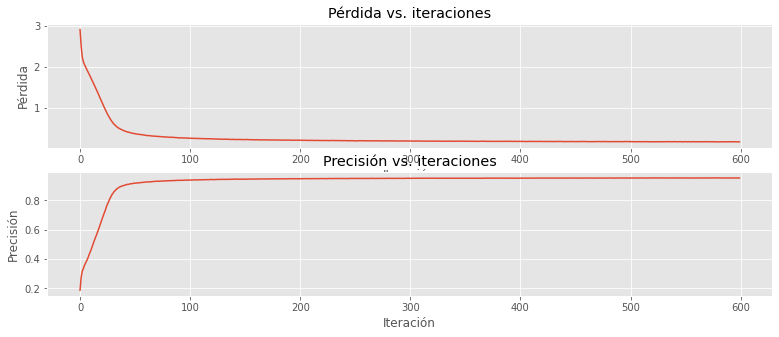

In [236]:
plt.figure(figsize=(13,5))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

## Generando Texto usando RNN

In [237]:
#creamos un modelo tomando como base el ultimo checkpoint
model = create_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1,None]))

In [238]:
#funcion para generar texto
def generate_text(model, start_string):
  #definimos cuantos tensores/cantidad de texto generaremos
  num_generate=500
  #convertimos el texto en números
  input_eval=[char2idx[s] for s in start_string]
  input_eval= tf.expand_dims (input_eval,0)
  text_generated = []

  temperature = 0.1  #(0.0 a  1) entre más alta la temperatura más creatividad al modelo, pero tambien más errores ortograficos.
  model.reset_states() #bucle para generar caracteres, mediante predicciones
  for i in range(num_generate):
    predictions = model(input_eval)
    predictions = tf.squeeze(predictions, 0)
    predictions = predictions / temperature
    predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
    input_eval= tf.expand_dims([predicted_id],0)
    text_generated.append (idx2char[predicted_id])
  
  return (start_string+ ''.join(text_generated))

### Generando texto

In [239]:
print(generate_text(model, start_string="soleado"))

soleado y me acuesto a dormir yo vivo en un pueblo podrido en donde todo esta podrido y voy de noche siempre a oscuras caminando entre la basura  no voy a llegar muy lejos en un omnibus lleno de viejos porque me asaltan con un caño delincuentes de doce años  asi quiero estar  los zapatos se me mojan pisando las baldosas flojas y la calle no me da tregua esta playback de mi vida cancion problemita todo lo que me gusta es pecado o hace mal todo lo que me gusta es muy caro o ilegal me mete en problemas qu


## Exportando modelo

Guardamos y Serializamos el Modelo (con esto ya podemos vender nuestro modelo de predicción de texto según lo aprendido por nuestra RNN).

In [240]:
from keras.models import model_from_json
import os

In [241]:
dir_export= 'C:/Users/derma/Documents/Exports/'

In [242]:
print(dir_export)

C:/Users/derma/Documents/Exports/


In [243]:
# Serializamos el modelo en forma JSON
model_json = model.to_json()
with open(os.path.join(dir_export,'RNN_rock_json.json'), 'w') as json_file:
    json_file.write(model_json)

    
# serialize weights to HDF5
model.save_weights(os.path.join(dir_export,'RNN_rock_pesos.hdf5'))
model.save(os.path.join(dir_export,'RNN_rock_model.h5'))
print("modelo salvado en Directorio Local")

modelo salvado en Directorio Local
